# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 2: Clasificación

__Número de grupo: 18__

__Nombres de los estudiantes: Hong Xiang Chen, Adrián Turiel Charro y Andrés Teruel Fernández__

Conjunto de datos relacionado con el diagnóstico de enfermedades cardiovasculares recopilado por el hospital _V.A. Medical Center, Long Beach and Cleveland Clinic Foundation (Robert Detrano, M.D., Ph.D.)_ y donado por David W. Aha a [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Heart+Disease/).

El objetivo es distinguir si los pacientes tienen una enfermedad cardiovascular. El atributo `target` contiene un valor que puede ser 0 (no enfermedad) o 1-4 indicando distintos tipos de enfermedades.

Cada uno de los pacientes se describe mediante los siguientes atributos:
- `age`: age in years
- `sex`: sex (1 = male; 0 = female)
- `cp`: chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)
- `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
- `chol`: serum cholestoral in mg/dl
- `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- `restecg`: resting electrocardiographic results (0: normal; 1:  ST-T wave abnormality; 2: probable or definite left ventricular hypertrophy)
- `thalach`: maximum heart rate achieved
- `exang`: exercise induced angina (1 = yes; 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: the slope of the peak exercise ST segment (1: upsloping; 2: flat; 3: downsloping)
- `ca`: number of major vessels (0-3) colored by flourosopy
- `thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect

Puede faltar datos en el conjunto de datos.

In [1]:
RANDOM_STATE=333

In [2]:
#Librerias
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
# Todavia queda alguna mas por abajo

## 1) Carga del conjunto de datos

Carga el conjunto de datos en un dataframe a partir del fichero `cleveland.csv`. 

Como todas las variables están codificadas como números, debemos indicar cuales son categóricas. Podemos hacerlo en cada columna de la siguiente forma:
```python
df['sex'] = df['sex'].astype('category')
```

En este problema sólo nos interesa saber si los pacientes están enfermos o no así que modifica esa columna del dataframe para que sólo tenga dos valores de tipo cadena: 'normal' y 'enfermo'.

Elimina los pacientes que tengan datos incompletos.

In [3]:
df = pd.read_csv('cleveland.csv') # Cargamos el conjuntos de datos
df = df.dropna()                  # eliminamos los pacientes con datos incompletos
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [4]:
# Indicamos las variables categoricas
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['thal'] = df['thal'].astype('category')
# TODO Alguna mas? 

In [5]:
# Añadimos una columna "Type" donde inicialmente todos sus valores serán "Normal"
df['Type'] = 'Normal'
# Consultando la columna target, en aquellas filas donde tengan un valor superior a 0,
# modificaremos su valor de la columna "Type" a "Enfermo"
df.loc[df['target'] > 0, 'Type'] = 'Enfermo'
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Type
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Normal
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Enfermo
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,Enfermo
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,Normal
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1,Enfermo
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,Enfermo
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,Enfermo
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,Enfermo


In [6]:
# ya podemos eliminar la columna target
df = df.drop(['target'], axis=1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Type
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,Normal
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,Enfermo
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,Enfermo
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,Normal
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,Enfermo
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,Enfermo
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,Enfermo
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,Enfermo


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica si debemos tenerlo en cuenta de algún modo.

Comprueba los rangos y distribuciones de las variables numéricas.

Estudia las relaciones 2 a 2 de las variables numéricas. Dibuja el diagrama de dispersión y calcula los coeficientes de correlación de Pearson. ¿Hay pares variables que separen bien las clases? ¿Hay correlaciones claras entre las variables? 

¿Crees que va a ser un problema sencillo o complicado de resolver?

In [7]:
# TODO Falta mucho por explicar en este ejercicio todavia

In [8]:
# Si nos fijamos en las filas min y max, esta función nos permite ver para cada variable su rango
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.676768
std,9.049736,17.762806,51.997583,22.941562,1.166123,0.938965
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


In [9]:
# TODO lo comento pq tarda mucho
#sns.pairplot(df, corner = True)
# sns.pairplot(df,diag_kind='kde', corner = True) para verlo con graficas redondeadas

In [10]:
#faltarian muchas variables no?
df.corr(method='pearson')

,age,trestbps,chol,thalach,oldpeak,ca
age,1.000000,0.290476,0.202644,-0.394563,0.197123,0.362210
trestbps,0.290476,1.000000,0.131536,-0.049108,0.191243,0.097954
chol,0.202644,0.131536,1.000000,-0.000075,0.038596,0.115945
thalach,-0.394563,-0.049108,-0.000075,1.000000,-0.347640,-0.268727
oldpeak,0.197123,0.191243,0.038596,-0.347640,1.000000,0.294452
ca,0.362210,0.097954,0.115945,-0.268727,0.294452,1.000000


## 3) Normalizar los datos

Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.

In [11]:
# Adaptar / modificar el comenteario d eabajo xd

 * Comentario segun behergue: En tanto nos disponemos a intentar construir un árbol de decisión, no es necesario normalizar los valores de nuestro conjunto de datos, pues no vamos a relacionarlos entre sí. El proceso de construcción de un árbol de decisión implica el cálculo de entropías, en el que sólo influyen las probabilidades de pertenecer a un clase u otra en base a cierta variable, lo cual es independiente del resto.

## 4) Profundidad óptima del árbol

Elige razonadamente la profundidad óptima del árbol de decisión usando validación cruzada en 10 partes. Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable `target`) y otro array que sólo contenga la variable de salida.

__Nota__: parece que la clase DecisionTreeClassifier no es capaz de trabajar con variables categóricas y usa sus correspondientes valores numéricos. Eso no es una buena idea porque establece una distancia entre las categorías que no tiene por qué tener sentido. Se podrían recodificar las variables categóricas usando un [OneHotEnconder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) pero en esta práctica no es necesario hacerlo.

In [12]:
# array que contiene sólo los datos de entrenamiento
dataX = df.copy()
dataX = dataX.drop(['Type'], axis=1)
#print(dataX)
# array que contiene sólo las variables de salida
dataY = pd.DataFrame()
dataY['Type'] = df['Type'].copy()
#print(dataY)

In [13]:
#árbol de decisión
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Partimos el conjunto de datos en entrenamiento (70%) y test (30%)
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.3, random_state=RANDOM_STATE)

In [14]:
train_accuracy = []
test_accuracy = []

# Entrenamos y validamos varios árboles con distintas profundidades máximas
max_depths = range(1, 12) # porque estos rangos ?
for md in max_depths: 
    clf = DecisionTreeClassifier(criterion="entropy",       # por defecto Gini
                                 max_depth=md,              # profundidad máxima del árbol
                                 min_samples_split=2,       # mínimo de muestras en el nodo para seguir dividiéndolo
                                 random_state=RANDOM_STATE)  
    
    scores = cross_validate(clf, dataX, dataY, scoring='accuracy', cv=10, return_train_score=True)

    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))

train_accuracy, test_accuracy

([0.764682206942814,
  0.7706691262787189,
  0.8518516965733133,
  0.8720484655374812,
  0.9147059645592265,
  0.9495066800827324,
  0.9712085639219632,
  0.9843032030856952,
  0.9940172731846386,
  0.9981329308513613,
  0.9996268656716417],
 [0.7404597701149426,
  0.7104597701149425,
  0.7906896551724139,
  0.7641379310344828,
  0.763793103448276,
  0.754367816091954,
  0.7677011494252873,
  0.7574712643678161,
  0.7573563218390804,
  0.747241379310345,
  0.747241379310345])

* Comentario: al limitar la profundidad maxima del árbol de decisión podemos obtener un clasificador menos "ajustado" a los datos de entrenamiento y, por tanto, que generalice mejor en datos nuevos. Por eso empleamos validación cruzada para calcular la profundidad optima probando para diferentes valores de ese parametro. Y como podemos observar, a mayor profundidad clasifica mejor los datos de entrenamiento, pero para los casos de prueba el mejor valor se optiene en profundidad 3 con un valor de 79% , y a partir de ahi disminuye poco a poco hasta alcanzar el valor de  74%, donde se mantendrá establable pese a seguir aumentando la profundidad.

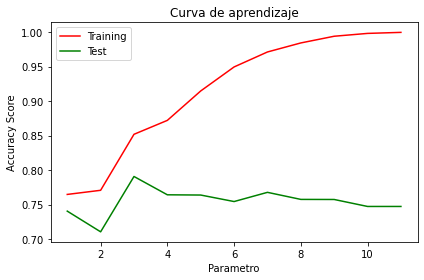

In [15]:
#Representación más gáfica

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

* Comentario: tras aplicar la validación cruzada en 10 partes, acabamos obteniendo la gráfica anterior, en la cual se aprecia que para los ejemplos de prueba, la mejor profundidad obtenida es 3. A partir de esa profundidad la métrica mejora para el conjunto de entrenamiento y empeora para el conjunto de test indicando que el clasificador está sobre-entrenado y generaliza peor.

## 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con la profundidad óptima y dibújalo. Analiza:

In [16]:
# Creamos un árbol de decisión y lo entrenamos
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3,min_samples_split=2, random_state=RANDOM_STATE)
clf = clf.fit(dataX, dataY)

df_variables = list(dataX.columns) 
print("Nombre de las variables: \n",df_variables)

df_targets = np.array(["Normal", "Enfermo"])
print("Nombre de lobjetivos finales: ",df_targets)

Nombre de las variables: 
 ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Nombre de lobjetivos finales:  ['Normal' 'Enfermo']


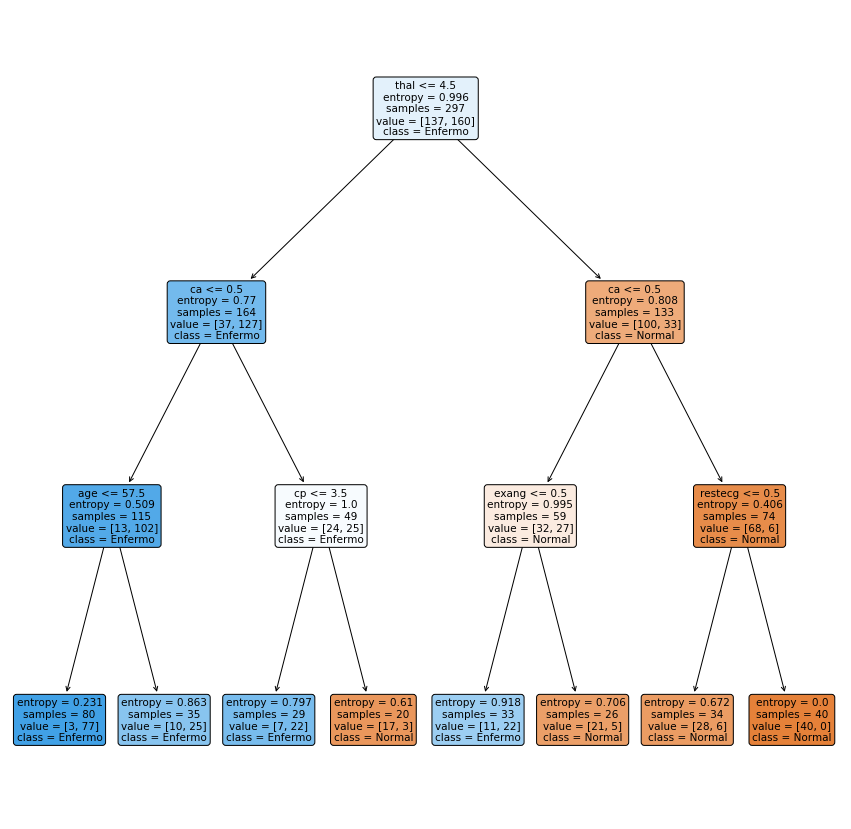

In [17]:
# Pintamos el árbol
plt.figure(figsize=(15,15))
plot_tree(clf, filled=True, feature_names=df_variables, class_names=df_targets, rounded=True)
plt.show()

- ¿Cuáles son las variables más importantes y en qué orden?

El algoritmo con el que construimos el arbol, es un modelos fácilmente interpretable, que sitúa en los primeros niveles a las variables que mejor separan las clases con las que trabajamos. En nuestro caso, destaca "thal" y a continuacion "ca". También podemos ver que el árbol termina separando adecuadamente las clases de pacientes para el conjunto de datos de entrenamiento, pues para cada hoja solo hay ejemplos de una unica clase, pero esto no quiere decir que mas alla de estos ejemplos clasifique perfectamente los datos. 

- ¿Hay variables del conjunto de datos que no se han usado?

Pues...

- ¿Hay variables del conjunto de datos que no se han usado

Pues...

- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 

Pues...

- ¿El árbol que hemos construido es capaz de separar las clases? 

Pues...

- ¿En cuál de los nodos hoja existe mayor confusión?

Pues...

## 6) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en un hospital real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [18]:
#Métricas detalladas por clase
# AVISO; FUNCIONAR FUNCIONA PERO A LO MEJOR HAY QUE USAR XTEST Y HE USADO X, POR EJEMPLO... 
#SIMPLEMENTE ESTA PARA CHEQUEAR QUE IMPRIME COSAS XD PERO MIRAR QUE VARIABLES SON LAS  BUENAS....REVISAR!!!!!!!!!!!

In [19]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Construimos el clasificador
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf, dataX, dataY, scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8105482743239228
Exhaustividad ponderada media:  0.7906896551724139
F1 ponderado media:  0.7803052323807546


In [20]:
# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)
predictions = cross_val_predict(clf, dataX, dataY, cv=10)

# Informe por clases
cr = classification_report(dataY,predictions, target_names=df_targets)
print(cr)

              precision    recall  f1-score   support

      Normal       0.82      0.71      0.76       137
     Enfermo       0.78      0.86      0.82       160

    accuracy                           0.79       297
   macro avg       0.80      0.79      0.79       297
weighted avg       0.79      0.79      0.79       297



In [21]:
#######################################################################################3

In [22]:
# Dejar para pruebas

dataY_booleanos = pd.DataFrame()
dataY_booleanos['Type'] = dataY['Type'].copy()
dataY_booleanos['Type'] = '0'
# Consultando la columna target, en aquellas filas donde tengan un valor superior a 0,
# modificaremos su valor de la columna "Type" a "Enfermo"
dataY_booleanos.loc[dataY['Type'] == "Enfermo", 'Type'] = '1'
dataY_booleanos

,Type
0,0
1,1
2,1
3,0
4,0
...,...
297,1
298,1
299,1
300,1


In [23]:
#predictions = np.where(predictions == "Normal", "0", "1")
#predictions = predictions.astype('int')
#predictions

In [24]:
pred = pd.DataFrame()
pred['Type'] = predictions
pred

,Type
0,Enfermo
1,Enfermo
2,Enfermo
3,Normal
4,Normal
...,...
292,Enfermo
293,Normal
294,Enfermo
295,Enfermo


In [25]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


In [27]:
# El parámetro normalize permite mostrar los porcentajes en lugar del número de instancias
#plot_confusion_matrix(dataY_booleanos, pred, df_targets, normalize=False)

In [28]:
# pruebas dani

In [29]:
dataList = dataY['Type'] == 'Normal'
dataList

0       True
1      False
2      False
3       True
4       True
       ...  
297    False
298    False
299    False
300    False
301    False
Name: Type, Length: 297, dtype: bool

In [30]:
p = predictions=='Normal'
p

array([False, False, False,  True,  True,  True, False,  True, False,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
       False, False, False,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
       False, False,  True, False,  True,  True, False,  True, False,
        True, False, False,  True,  True, False,  True,  True, False,
       False, False, False, False, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False, False,  True,  True,
        True,  True, False,  True, False,  True, False,  True, False,
       False, False, False,  True, False, False, False,  True,  True,
       False, False, False, False,  True, False,  True,  True, False,
       False,  True,

Confusion matrix, without normalization
[[27  6]
 [ 3 54]]


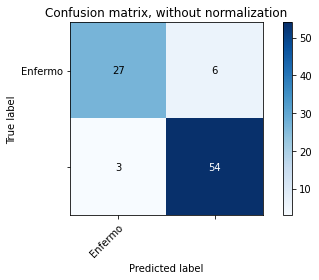

In [31]:
# Cosas Chen
clf= clf.fit(X_test,y_test)
pre = clf.predict(X_test)
pre = pre =='Normal'
pre
d = y_test['Type'] == 'Normal'
d = d.to_numpy()
d
plot_confusion_matrix(d, pre, df_targets, normalize=False)

Confusion matrix, without normalization
[[ 97  40]
 [ 22 138]]


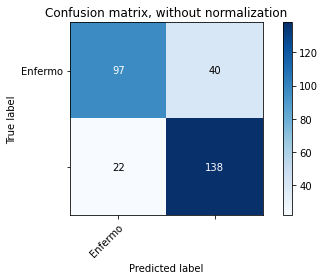

In [32]:
dataList = dataY['Type'] == 'Normal'
dataList = dataList.to_numpy()
np.shape(dataList)
p = predictions=='Normal'
np.shape(p)
plot_confusion_matrix(dataList, p, df_targets, normalize=False)